In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from scipy import spatial
from tqdm.auto import tqdm

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-a86jopst because the default path (/home/i313924/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
model = pd.read_pickle('/pio/scratch/1/i313924/data/svd_data/model_300_epochs_slim.pkl')

## ABX

In [3]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/data/test_data/test_ABX_weighted_slim.json', lines=True)

In [4]:
def get_item_embedding(model, asin):
    item_id = model.item_mapping_[asin]
    return model.qi_[item_id]

In [5]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [6]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, test["A"])
    B[i, :] = get_item_embedding(model, test["B"])
    X[i, :] = get_item_embedding(model, test["X"])

0it [00:00, ?it/s]

In [7]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [8]:
(dist_A < dist_B).mean()

0.4998

In [9]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [10]:
(cos_dist_A < cos_dist_B).mean()

0.4946

## Embeddings PCA

In [11]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [12]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.029987,-0.044815,0.137390,0.008298,0.075233,-0.029318,0.066092,-0.019747,-0.065639,0.077143,...,0.048870,0.252760,0.061430,0.084964,0.177003,-0.074906,0.023485,-0.028891,0.117091,0.058737
1,0.172496,-0.058552,-0.072528,0.035899,0.137022,0.039840,-0.099821,0.053019,0.030431,-0.087323,...,0.007790,0.042457,-0.034404,0.284191,-0.065172,0.076879,0.001348,-0.118736,0.054654,-0.150704
2,-0.068883,-0.115436,-0.206904,-0.056702,0.187746,-0.001468,0.108889,0.102048,-0.153499,-0.070936,...,-0.180951,-0.197583,-0.137500,0.026372,0.154922,0.006257,0.077818,0.034888,0.065445,-0.063445
3,0.110924,-0.008017,0.139493,0.180834,-0.174510,0.066324,-0.087989,0.103434,-0.086941,-0.258336,...,-0.214415,0.087396,0.062796,-0.144033,0.048694,0.100413,0.044476,0.146433,0.177866,0.114236
4,0.045662,-0.087935,0.041568,-0.071294,-0.136361,0.079905,-0.126077,0.071499,-0.113139,-0.045118,...,0.015063,0.106500,0.067978,0.017887,0.068436,0.109019,0.043709,-0.023224,-0.076301,0.088780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,0.133736,-0.071298,0.053373,0.012823,0.015908,-0.063648,-0.048806,-0.117728,0.036679,0.128728,...,0.029322,0.135603,0.070335,0.045520,-0.121712,-0.077379,-0.134841,0.289567,0.095946,-0.078201
206492,-0.114584,-0.029044,0.073156,-0.007853,0.054990,-0.098811,0.005845,0.134257,0.019918,0.128808,...,0.080355,-0.110390,-0.086335,-0.000090,0.097556,0.179649,0.222927,0.086641,-0.015551,-0.163337
206493,-0.066224,-0.160506,0.117411,-0.179724,0.126953,0.187944,-0.075266,0.038684,-0.047143,-0.017130,...,-0.078237,0.139210,0.114505,0.060973,0.085942,-0.005734,-0.005512,-0.092281,0.091316,-0.039315
206494,-0.222432,0.066008,-0.020573,-0.025008,0.149274,0.121355,-0.039445,-0.148363,-0.117258,0.103008,...,0.080434,0.081514,-0.046314,0.195284,-0.298675,-0.005499,-0.004061,-0.016877,0.004462,-0.186654


In [13]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [14]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [15]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

In [16]:
reduced_item_embeddings

,0,1
0,-0.336779,0.148186
1,-0.065407,-0.069309
2,-0.333764,0.289955
3,-0.373467,-0.026243
4,-0.064121,-0.000295
...,...,...
206491,0.102008,0.002888
206492,-0.093482,-0.083994
206493,0.145819,-0.013207
206494,0.070604,-0.042158


In [17]:
reduced_user_embeddings

,0,1
0,0.293275,-0.264720
1,0.084311,-0.046514
2,-0.134664,-0.028591
3,0.146090,0.321715
4,0.012066,0.018418
...,...,...
101039,-0.181930,0.124267
101040,-0.055199,0.060508
101041,-0.129657,0.156748
101042,-0.215415,-0.025316


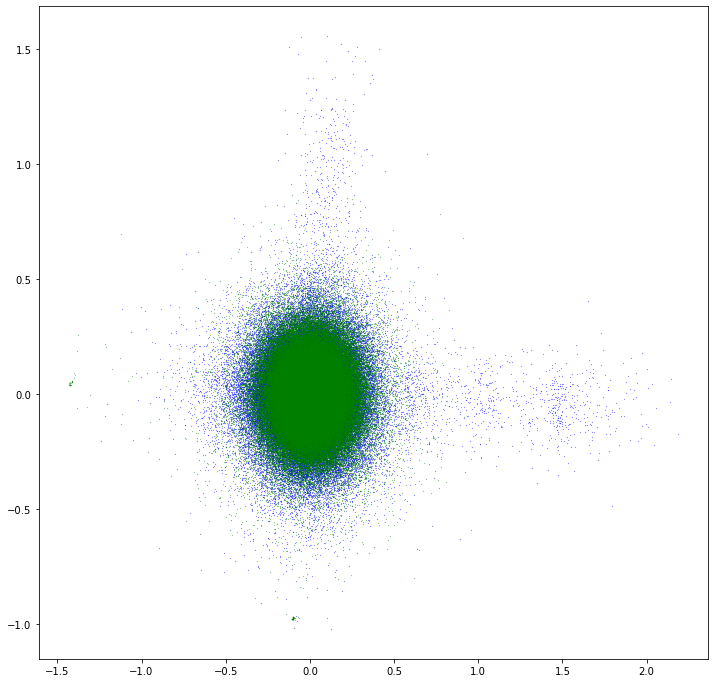

In [18]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)

In [19]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [20]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [21]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [22]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [23]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

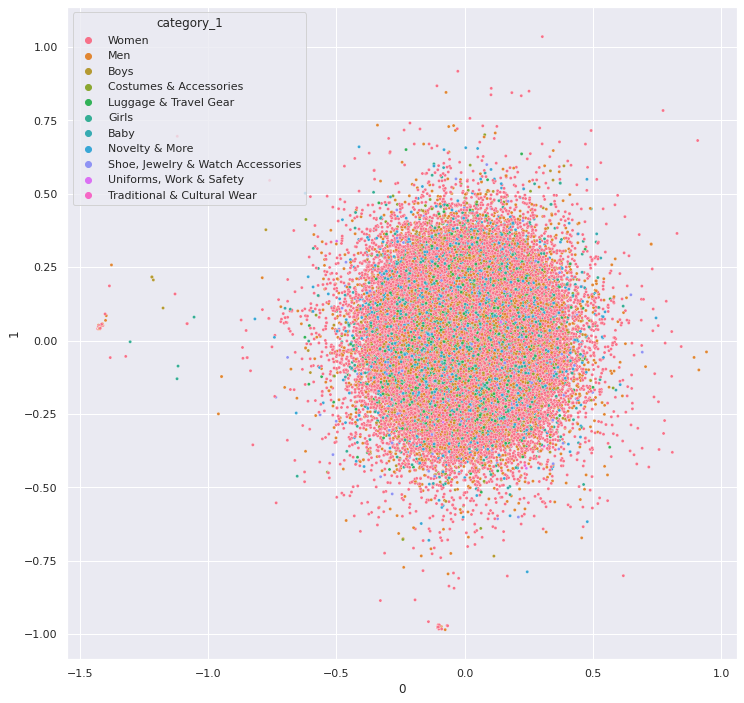

In [24]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

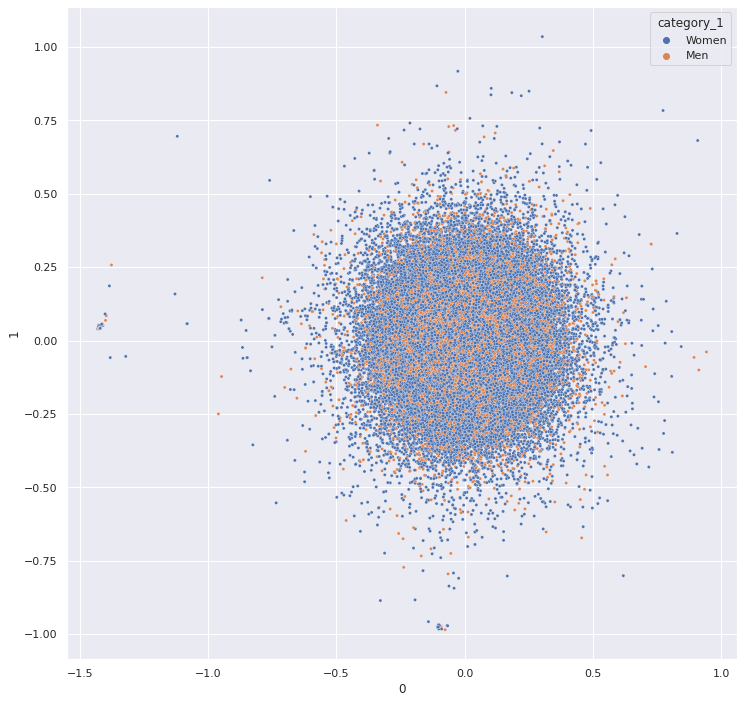

In [25]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)